## Assignments for Week-02

In this course, we learnt what's the search problem and what's the machine leanring. In this assignment, we need you do some more practice.

### 1. Re-code the house price machine learning

###### 1. Random Choose Method to get optimal *k* and *b*
###### 2.Supervised Direction to get optimal *k* and *b*
###### 3.Gradient Descent to get optimal *k* and *b*
###### 4. Try different Loss function and learning rate. 

For example, you can change the loss function: $Loss = \frac{1}{n} sum({y_i - \hat{y_i}})^2$ to $Loss = \frac{1}{n} sum(|{y_i - \hat{y_i}}|)$

And you can change the learning rate and observe the performance.

In [13]:
# prepare the data
import matplotlib.pyplot as plt
import random
from sklearn.datasets import load_boston
data = load_boston()
X, y = data["data"], data["target"]

In [14]:
# price function and loss function and draw function

def price(rm, k, b):
    return k * rm + b

def loss(y, y_hat):
    return sum((y_i - y_hat_i) ** 2 for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(list(y))

def draw_rm_and_price():
    plt.scatter(X[:, 5], y)
    
X_rm = X[:, 5]
k = random.randint(-100, 100)
b = random.randint(-100, 100)
price_by_random_k_and_b = [price(r, k, b) for r in X_rm]

##### 1. Random Choose Method to get optimal *k* and *b*

In [15]:
trial_count = 10000

min_loss = float('inf')
k_star, b_start = None, None

for i in range(trial_count):
    k = random.random() * 200 - 100
    b = random.random() * 200 - 100
    price_by_random_k_and_b = [price(r, k, b) for r in X_rm]
    
    current_loss = loss(y, price_by_random_k_and_b)
    
    if current_loss < min_loss:
        min_loss = current_loss
        best_k, best_b = k, b
        print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss)) 
        # time consumting !!!!!

When time is : 0, get best_k: -55.268702290267214 best_b: 75.37987329575373, and the loss is: 88813.33339529355
When time is : 1, get best_k: -14.887969607002162 best_b: -92.35142530902736, and the loss is: 43778.426410757485
When time is : 2, get best_k: -1.3675508318395515 best_b: -25.851654046753694, and the loss is: 3344.2151538762705
When time is : 19, get best_k: -5.220752589658488 best_b: 20.384701655192885, and the loss is: 1366.7797246579928
When time is : 41, get best_k: -3.6377925269955824 best_b: 55.72905528928331, and the loss is: 230.36014388017816
When time is : 45, get best_k: -3.2151976877812416 best_b: 46.436121158942285, and the loss is: 132.0179291573445
When time is : 138, get best_k: -0.7390959490884796 best_b: 21.342898517415094, and the loss is: 125.36328585232344
When time is : 146, get best_k: 1.2402111354076055 best_b: 16.806069312468424, and the loss is: 78.3284733900077
When time is : 654, get best_k: 15.702033698213597 best_b: -75.03692127587705, and the l

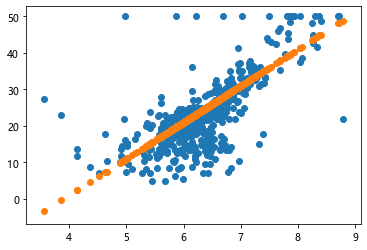

In [16]:
X_rm = X[:, 5]
k = 10
b = -39
price_by_random_k_and_b = [price(r, k, b) for r in X_rm]

draw_rm_and_price()
plt.scatter(X_rm, price_by_random_k_and_b)

###### 2.Supervised Direction to get optimal *k* and *b*

In [17]:
trial_count = 10000

min_loss = float('inf')
best_k = random.random() * 200 - 100
best_b = random.random() * 200 - 100
    
direction = [(+1, -1),(+1, +1),(-1, -1),(-1, +1)]
next_direction = random.choice(direction)
    
scalar = 0.1
update_time = 0


for i in range(trial_count):

    k_direction, b_direction = next_direction
    
    current_k, current_b = best_k + k_direction * scalar, best_b + b_direction * scalar
    
    price_by_k_and_b = [price(r, current_k, current_b) for r in X_rm]
    
    current_loss = loss(y, price_by_k_and_b)
    
    if current_loss < min_loss:
        min_loss = current_loss
        best_k, best_b = current_k, current_b
        
        next_direction = next_direction
        update_time += 1
        
        if update_time % 10 == 0:
            print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss)) 
    else:
        next_direction = random.choice(direction)

When time is : 9, get best_k: 9.738735676690812 best_b: -33.672478768442716, and the loss is: 68.79131906478767


## 2. Answer following questions:


###### 1. Why do we need machine learning methods instead of creating a complicated formula?


Ans: 我们需要较为简单的映射关系，同时不是所有信息见得关系都能用公式准确反应

###### 2.  Wha't's the disadvantages of `the 1st Random Choosen` methods in our course? 

Ans: 结果不稳定，每次实现的损失函数最小值之间差异较大

###### 3. Is the `2nd method supervised direction` better than 1st one?  What's the disadvantages of `the 2nd supversied directin` method? 

Ans: 第二个方法没有比第一个方法更好，问题在于当我们得到一组使得损失函数变小的k,b 时， 我们总是会沿着这个方向继续搜索，这缩小了我们寻找最优解的范围

###### 4. Why do we use `Derivative / Gredient` to fit a target function? 

Ans:

###### 5. In the words 'Gredient Descent', what's the `Gredient` and what's the `Descent`?

Ans:

###### 6. What's the advantages of `the 3rd gradient descent method` compared to the previous methods?

Ans:

###### 7. Using the simple words to describe: What's the machine leanring.

Ans:找到一种映射关系，基于我们观察到的信息尽可能准确的反映到我们需要实现的目标上

## 3. Finish the search problem

Please using the search policy to implement an agent. This agent receives two input, one is @param start station and the other is @param destination. Your agent should give the optimal route based on Beijing Subway system. 

> Deadline: 2019-July-13

>Submit: Submit the source code and result to github. 



![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562414356407&di=b57814aafd215bb8b8d9d8cd37c573d6&imgtype=0&src=http%3A%2F%2Fcli.clewm.net%2Ffile%2F2015%2F03%2F24%2F174ed60082b8422ac0636cfd3efb9e7f.jpg)

#### Dataflow: 

##### 1.	Get data from web page.

> a.	Get web page source from: https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81/408485

> b.	You may need @package **requests**[https://2.python-requests.org/en/master/] page to get the response via url

> c.	You may need save the page source to file system.

> d.	The target of this step is to get station information of all the subway lines;

> e.	You may need install @package beautiful soup[https://www.crummy.com/software/BeautifulSoup/bs4/doc/]  to get the url information, or just use > Regular Expression to get the url.  Our recommendation is that using the Regular Expression and BeautiflSoup both. 

> f.	You may need BFS to get all the related page url from one url. 
Question: Why do we use BFS to traverse web page (or someone said, build a web spider)?  Can DFS do this job? which is better? 

In [18]:
import requests 
import pandas as pd
from collections import defaultdict
import re

link = "http://www.bjsubway.com/station/zjgls/#"
r = requests.get(link)
r.encoding ="gb2312"
page_text = r.text


from bs4 import BeautifulSoup 

soup = BeautifulSoup(page_text,"html.parser")


parent_path = 'body > div > div > div > div > '
L1 = soup.select(parent_path + "div > div > table > tbody > tr > th")
L2 = soup.select(parent_path + "div > div > table > tbody > tr > td:nth-of-type(1)")

stations = [x.get_text() for x in L1]
distance = [x.get_text() for x in L2]


##### 2.	Preprocessing data from page source.

> a.	Based on the page source gotten from url. You may need some more preprocessing of the page. 

> b.	the Regular Expression you may need to process the text information.

> c.	You may need @package networkx, @package matplotlib to visualize data. 

> d.	You should build a dictionary or graph which could represent the connection information of Beijing subway routes. 

> e.	You may need the defaultdict, set data structures to implement this procedure. 

In [19]:
station_connection = defaultdict(list)

pattern = re.compile(r"(\w+)――(\w+)")

for item in stations:
    start, end = pattern.findall(item)[0]
    station_connection[start].append(end)
    station_connection[end].append(start)
    

##### 3. Build the search agent

> Build the search agent based on the graph we build.

for example, when you run: 

```python
>>> search('奥体中心', '天安门') 
```
you need get the result: 

奥体中心-> A -> B -> C -> ... -> 天安门



In [20]:

def search(start, destination, connection):
    pathes = [[start]]
    
    visitied = set()
    
    while pathes: # if we find existing pathes
        path = pathes.pop(0)
        froninter = path[-1]
        
        if froninter in visitied: continue
            
        successors = connection[froninter]
        
        for city in successors:
            if city in path: continue  # eliminate loop
                
            new_path = path + [city]
            
            pathes.append(new_path)
            
            if city == destination: return new_path
        
        visitied.add(froninter)


def station_print(cities):
    print('->'.join(cities))

station_print(search("来广营", "苹果园", station_connection))

来广营->东湖渠->望京->望京西->芍药居->惠新西街南口->和平西桥->和平里北街->雍和宫->安定门->鼓楼大街->积水潭->西直门->车公庄->车公庄西->白石桥南->白堆子->军事博物馆->公主坟->万寿路->五棵松->玉泉路->八宝山->八角游乐园->古城->苹果园


## （Optional）Create different policies for transfer system.


以下部门为可选部分，请酌情完成。 并不要求全部同学完成。

As much as you can to use the already implemented search agent. You just need to define the **is_goal()**, **get_successor()**, **strategy()** three functions. 

> a.	Define different policies for transfer system. 

> b.	Such as Shortest Path Priority（路程最短优先）, Minimum Transfer Priority(最少换乘优先), Comprehensive Priority(综合优先)

> c.	Implement Continuous transfer. Based on the Agent you implemented, please add this feature: Besides the @param start and @param destination two stations, add some more stations, we called @param by_way, it means, our path should from the start and end, but also include the  @param by_way stations. 

e.g 
```
1. Input:  start=A,  destination=B, by_way=[C] 
    Output: [A, … .., C, …. B]
2. Input: start=A, destination=B, by_way=[C, D, E]
    Output: [A … C … E … D … B]  
    # based on your policy, the E station could be reached firstly. 
![image.png](attachment:image.png)
```

##### 5.	Test your result with commercial applications. 

将你的结果和高德地图或者百度地图进行比较，如果有不同，请分析原因


恭喜，完成本次课程，你对常用的人工智能方法以及有一定的了解了。基于规则的，基于概率模型的，基于搜索的，基于机器学习的。 可以说，我们现在通常见到的方法都能够归属到这几类方法中。 这就是**人工智能**，并没有很难是吧？ 继续加油！

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562415163815&di=4b29a2a863a8285212033760f288ed7a&imgtype=0&src=http%3A%2F%2F5b0988e595225.cdn.sohucs.com%2Fimages%2F20180710%2F8704194a1d7f46a383ddc29d40c9bca5.jpeg)